# Supernovae as standard candles
Group 7: Eppacher Felix (), Schallar Thomas (), Zgureanu Seph (12130595)

## 1. Scientific background
At the end of their lives, the most massive stars undergo a sudden collapse which leads to an explosion which can outshine entire galaxies, a supernova. Supernovae (SNe) are among the most powerful events in our universe. They release extreme amounts of energy as well as heavy elements, which likely only form during SNe, get ejected into space, enriching the ISM and creating the building blocks for new star formation.
SNe are divided into Type I and Type II. The difference between them is the abscence of hydrogen (H) lines in the spectra of Type I SNe whereas Type II SNe contain obvious H lines. [1]

### Standard candles
Astronomy is restricted to mostly studying objects from afar. For the most part this means astronomers can only observe the light an object emits. An important question when you discover something is: "How far away is it?" When the distances get so large that parallaxes are no longer of use, it is up to the light to answer this question. This is where standard candles come into play. Standard candles are astronomical objects which emit light of a known luminosity. With this information you only have to measure the apparent luminosity, put it in the distance modulus formula, and solve for $d$.

$m-M=5\cdot\log_{10} (d) -5$

where:
- $m$ is the apparent magnitude,
- $M$ is the absolute magnitude,
- $d$ is the distance to the object in parsecs.

An example of standard candles are cepheids which are pulsating stars that change their brightness with a well-defined stable period and amplitude. However at larger distances it is harder to make out single stars inside a galaxy and brighter objects are needed. SNe type Ia are such objects. With typical peak luminosities of about $M_{B} = -19.5 \text{mag}$ they can outshine galaxies. [1]

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/typeia1.jpg">

https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova

### Supernovae Type Ia
SNe Ia are characterized by a strong ionized silicon absorbtion in their spectra. A large fraction of observed SNe Ia (∼ 70%) is found to show remarkable homogeneity and a clear empirical relationship between light curve width and peak luminosity, the so-called "Phillips relation". These SNe Ia are commonly referred to as "normal SNe Ia" and have been used to determine cosmological parameters, which has led to the discovery of the accelerating expansion of the universe.

SNe Ia are widely thought to be thermonuclear explosions of white dwarfs in binary systems. However, there is no agreement on the fundamental aspects of the nature of the progenitor systems (i.e. the stars from which SNe Ia arise) and their explosion mechanism neither from theoretical nor observational side. [1]

<img src="https://www.schoolsobservatory.org/sites/default/files/discover/supernovaeproject/Type%20Ia.jpg">

https://www.schoolsobservatory.org/learn/astro/stars/cycle/ia_supernova

### Original idea
Type Ia SNe were first proposed as standard candles by D. Branch and G. A. Tammann in a 1992 paper. [3] SNe Ia are suitable as standard candles because they have a consistently shaped light curve and maximum luminosity, therefore they are easy to tell apart from other astronomical events and objects. 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Comparative_supernova_type_light_curves.png?20120604155323">

https://commons.wikimedia.org/wiki/File:Comparative_supernova_type_light_curves.png

### Current challanges
Unfortunately one can't simply assume that the peak luminosity of a type Ia SN is exactly -19.5 mag and simply plug in numbers in the distance modulus formula. Some of them shine dimmer or brighter than a standard SN. The fainter SNe's brightness declines more rapidly than that of brighter ones. Thus type Ia SNe aren't standard candles, but rather standardisable. There are various methods for this, which turn SNe Ia into true standard candles. [4] Additionally, it is crucial to correct SNe's brightness for extinction. Some SNe's light is dimmed becasue of interstellar dust between the SNe and the observer.

SNe Ia are used to determine distances to other galaxies, as well as constrain cosmological parameters. An important assumption that scientists make is that nearby SNe are physically similar to extragalactic SNe. Nearby SNe, which are close enough for their distances to be determined with other methods, were used for distance callibration. It is possible that nearby SNe are part of a biased population. Such was the case for cepheids, nearby cepheids being population I stars whith a higher metallicity. Discoverting that distant cepheids are population II stars, and therefore much brighter, increased the distances as well as the estimated diameter of the Milky Way by around a factor of 2. Therefore it is still an open question wether type Ia SNe can truly be used as standard candles.

### How is data collected?
High-quality data collection on Type Ia supernovae (SNe Ia) began with the Calán/Tololo survey in the 1990s, led by Mario Hamuy and colleagues. This foundational survey provided the first systematic dataset for 29 nearby SNe Ia, using CCD photometry to measure light curves and distances up to redshifts of 0.1. Currently, the Harvard-Smithsonian Center for Astrophysics (CfA) manages one of the largest ongoing SNe Ia campaigns at the Fred Lawrence Whipple Observatory (FLWO), where high-quality, multicolor photometric and spectroscopic data have been collected since 1993, expanding the dataset of nearby SNe Ia.

The CfA program relies on a network of amateur and professional astronomers for new SNe discoveries, receiving notifications coordinated by the IAU’s Central Bureau for Astronomical Telegrams. Once a supernova is confirmed and classified, the CfA team conducts follow-up photometry using CCD detectors, tracking each SNe’s brightness over time in multiple passbands (UBVRI) to create light curves. Observations are made over several weeks, covering each supernova’s peak and decline to produce data for accurate distance measurements. Data processing involves photometric calibration, background, and galaxy subtraction to ensure precise light isolation. [2]

## 2. Data Distributions

### Plot of SNe light curves

To get an overview of what's going on, we plotted out all data files that contained values of the apparent luminosity for all five filters (U,B,V,R,I) and with at least 20 observations. Since the data files contained error margins for the values of the light intensities, we made them visible with error bars.

The error bars show that the measurements were not taken at regular intervals. In some cases, the intervals are greater than 100 days, making them difficult to compare.

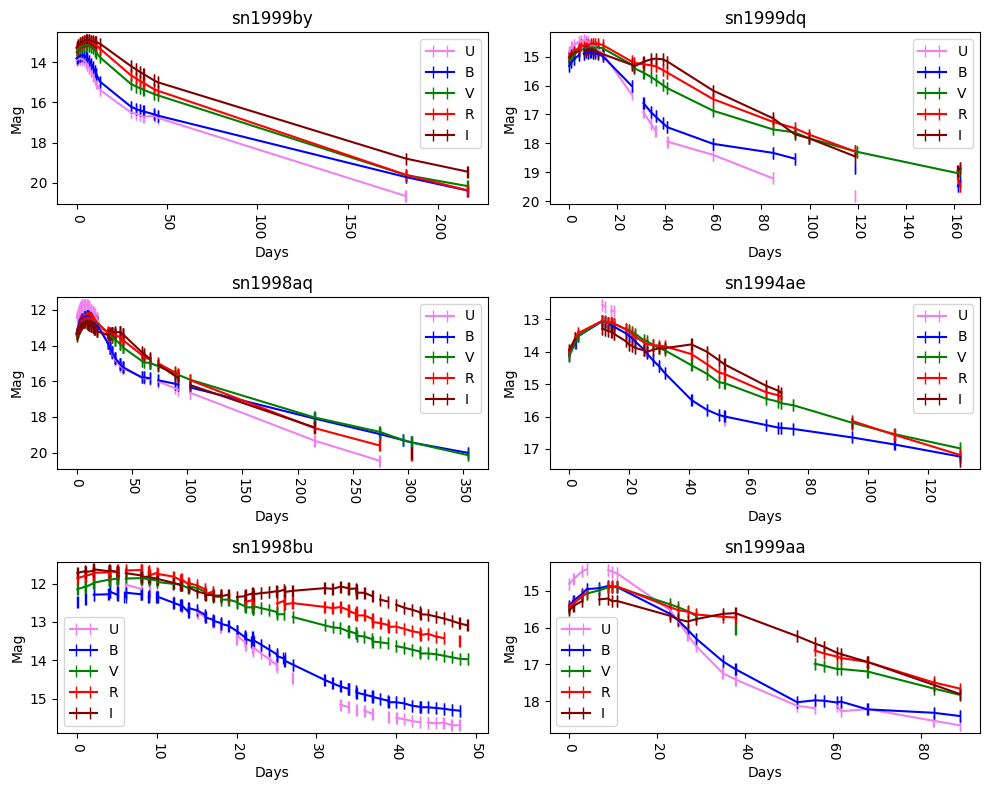

In [104]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat")
plt.figure(figsize=(10, 8))
i=0

for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # plot only, if 20+ observations are available
        if len(df) >= 20:
            i+=1
            plt.subplot(3,2,i)
            # Replace missing data with NaN
            df[df == 99.999] = float("NaN")
            df[df == 99.99] = float("NaN")
            # convert HJD to days from first observation
            df["HJD"]-= df["HJD"].iat[0]
            
            # Plot light curves for each filter
            for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
                plt.errorbar(df["HJD"].values, df[filter].values, label=filter, color=color, xerr=df[filter+"err"].values, capsize=4)

        
            plt.title(file[26:34])
            plt.xlabel("Days")
            plt.ylabel("Mag")
            plt.xticks(rotation=270)
            plt.gca().invert_yaxis()
            plt.legend()
           
            
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

plt.tight_layout()
plt.show()


We can see that the brightness of every SNe peaks and then is decreasing over time. Since we have every type of SN in this data set, each of them with a different characteristic lightcurve, we cannot compare them to each other without knowing their types. Moreover only type Ia SNe have stadardisible lightcurves and can be used as standard candles. Therefore we shall use the data set only containing known SNe Ia going forward.

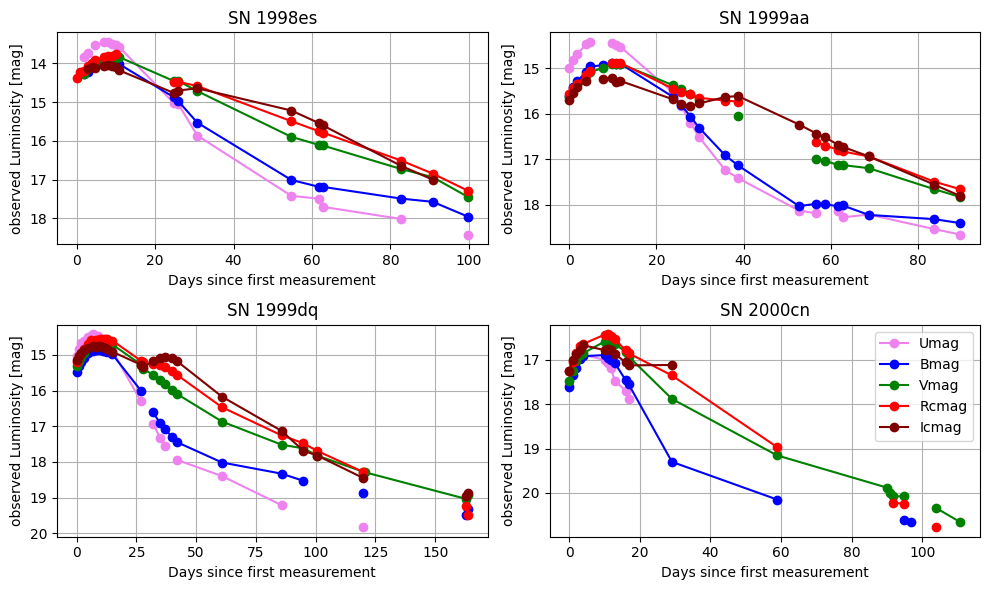

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ["SN", "HJD", "Umag", "e_Umag", "Bmag", "e_Bmag", 
                "Vmag", "e_Vmag", "Rcmag", "e_Rcmag", "Icmag", "e_Icmag", "Det_Filt"]
colspecs = [(0, 9), (10, 20), (21, 27), (28, 33), (34, 40), (41, 46), 
            (47, 53), (54, 59), (60, 66), (67, 72), (73, 79), (80, 85), (86, 110)]

i=0
df = pd.read_fwf("Supernova_Ia/table4.dat", colspecs=colspecs, names=column_names, na_values="?")
plt.figure(figsize=(10, 6))

grouped = df.groupby("SN")

for sn_name, sn_data in grouped:
    if len(sn_data)>=20:
        i+=1
        plt.subplot(2,2,i)

        sn_data = sn_data.sort_values("HJD")  
        sn_data["Days"] = sn_data["HJD"] - sn_data["HJD"].min()

        filters = {"Umag": "violet", "Bmag": "blue", "Vmag": "green", "Rcmag": "red", "Icmag": "#800000"}

        for filter, color in filters.items():
            if not sn_data[filter].isna().all():  
                plt.plot(sn_data["Days"], sn_data[filter], label=filter, color=color, marker="o", linestyle="-")

        plt.gca().invert_yaxis()  
        plt.xlabel("Days since first measurement")
        plt.ylabel("observed Luminosity [mag]")
        plt.title(f"{sn_name}")
        plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()


We observe a second maximum in the infrared filter measurement of type Ia SNe. This is possibly due to the ionization evolution of iron group elements in the ejecta. This secondary maximum seems to be very consistent in the brighter SNe, making them perfect candidates for standard candles. Moreover, observing SNe in infrared largerly eliminated uncertainties in the reddening corrections. However SNe are typically quite dim in the infrared, making distant SNe harder to observe and posing a challange for cosmological studies. [5]

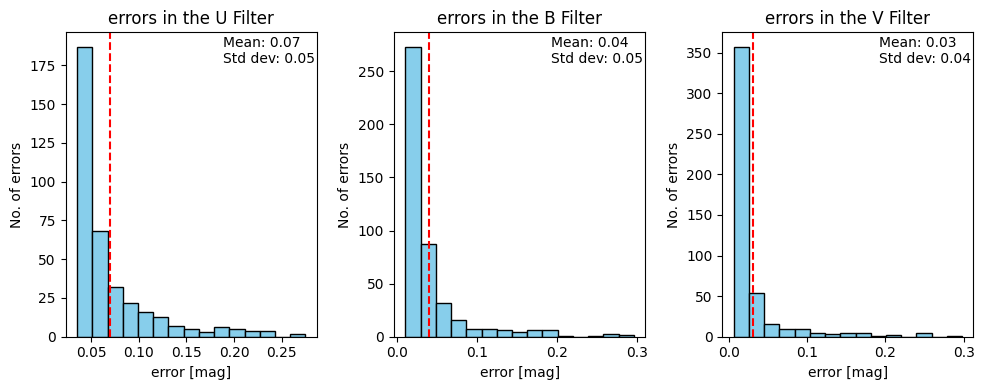

In [62]:
e_filters = ["e_Umag", "e_Bmag", "e_Vmag"]
i=0
plt.figure(figsize=(10, 4))
for f in e_filters:
    i+=1
    e_filter_df = df[f]
    mean = round(e_filter_df.mean(), 2)
    std = round(e_filter_df.std(), 2)
    plt.subplot(1,3,i)
    #plt.figure(figsize=(4, 3))
    plt.hist(e_filter_df, bins=15, color='skyblue', edgecolor='black')
    plt.xlabel(f'error [mag]')
    plt.ylabel('No. of errors')
    plt.title(f'errors in the {f[2:3]} Filter')
    plt.text(0.625 , 0.9 , f'Mean: {mean} \nStd dev: {std}', 
             transform=plt.gca().transAxes )
    plt.axvline(mean, color = 'red', linestyle = 'dashed')
plt.tight_layout()
plt.show()

We observe a power law distribution of errors in all filters, only the first 3 were plotted. This indicates that small errors are most common, which is typical for a large signal to noise ratio in photometric measurements.

## 3. Statistical Inference
With the Phillips Relation we can determine the absolute magnitude of a SNe Ia. The relationship is defined for 3 different filters: B, V, and I, each of them with diffferent parameters. [6] We chose the equation for the V filter, since it's less affected by extinction than the B filter. Ideally we would choose the I filter to minimize extiction. Unfortunately type Ia SNe don't peak at one specific luminosity in the I band, making them difficult to compare to one another.

$M_V = -20.883 + 1.949 \cdot \Delta m_{15}$

where:
- $M_V$ is the maximum absolute luminoisty in the I filter
- $\Delta m_{15}$ is the change in brightness in the I filter 15 days after the maximum

We will use the absolute magnitude and distance we calculated in the following code to analyze our data and conduct some statistical tests.

In [63]:
from scipy.interpolate import CubicSpline

Mags_Delm15 = []

def phillips_relation(delta_m_15):
    M_max_I = -20.883 + 1.949*delta_m_15
    return M_max_I

for sn_name, sn_data in grouped:
    try:
        sn_data = sn_data.dropna(subset=["HJD", "Vmag"])

        # Find time of maximum brightness and corresponding magnitude
        start_idx = sn_data["HJD"].idxmin() # Index of first item of specific SN 
        max_idx = sn_data["Vmag"].idxmin() # Index of maximum brightness
        max_idx = max_idx - start_idx #index correction, df -> sn df index
        max_day = float(sn_data["HJD"].iat[max_idx]) # Date of maximum brightness 
        m_i_max = float(sn_data["Vmag"].iat[max_idx]) # Max brightness
        max_day15 = max_day + 15 # Date 15 days after maximum
        jd_known = sn_data["HJD"].values
        mag_known = sn_data["Vmag"].values
        spl = CubicSpline(jd_known,mag_known)
        m_i_15 = spl(max_day15) # Interpolate an approximate value for mag on 15th day

        # Calculate ∆m15
        delta_m15 = m_i_15 - m_i_max
        #print("SN", sn_name)
        #print("max apparent Imag:", m_i_max)
        M_I = phillips_relation(delta_m15) 
        #print("Absolute mag:", M_I, "mag")

        # distance to the supernova
        mu = m_i_max - M_I
        distance_pc = 10 ** ((mu + 5) / 5)
        distance_mpc = distance_pc/(10**6)
        #print("distance:", distance_mpc, "Mpc")

        if M_I > (-22) and M_I < (-15):
            Mags_Delm15.append((M_I, m_i_max, delta_m15, distance_mpc)) #max abs, max obs, del m 15, dist [Mpc]
        else:
            print('Outlier skipped')
        #print()

    except Exception as oops:
        print(f"{sn_name} ignored due to error: {oops}")



# Creates numpy array out of list for plotting/ data analysis
data_array = np.array(Mags_Delm15)

max_abs_mag = data_array[:,0]
max_obs_mag = data_array[:,1]
del_m = data_array[:,2]
dist = data_array[:,3]



### Combined quantity data plot

We expect SNe to get fainted with distance, hence a Distance vs observed Luminosity plot. The data points show a relatively strong correlation. The relationship is linear.

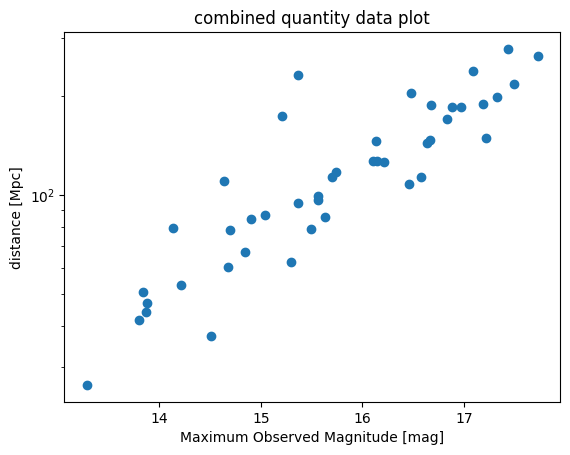

In [64]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

### Analysing the distribution of Maximum Absolute Magnitudes 

Mean =  -19.398198519259882
Standard deviation =  0.3528603196256347
1-sigma Confidence Interval: (-19.751058838885516, -19.045338199634248)


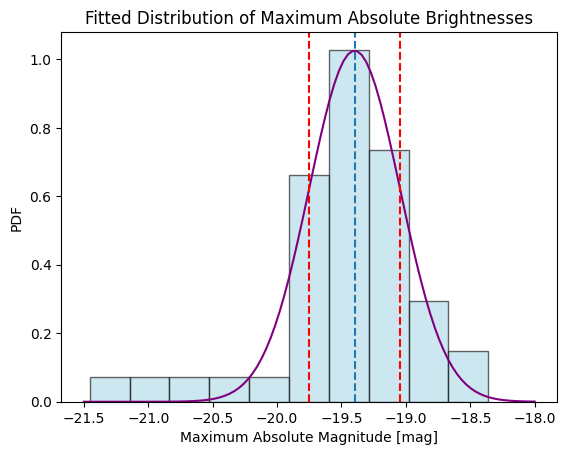

In [65]:
from scipy.optimize import curve_fit

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-21.5,-18,100)

# fit the data and plot the result
param, cov = curve_fit(gaussian, bins,counts, p0=[1, np.mean(max_abs_mag), np.std(max_abs_mag)])
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)

# access fit parameters
mean_gaus = param[1] #mean of gaussian dist
std_gaus   = param[2] #stdev of the dist

print('Mean = ', mean_gaus)
print('Standard deviation = ', std_gaus)
print(f"1-sigma Confidence Interval: ({mean_gaus-std_gaus}, {mean_gaus+std_gaus})")

plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(mean_gaus - std_gaus, color = 'red', linestyle = 'dashed')
plt.axvline(mean_gaus + std_gaus, color = 'red', linestyle = 'dashed')

plt.show()

The distribution of absolute luminosities of SNe Ia seem to follow a Gaussian distribution. We calculated the mean to be around -19.4 mag. Comparing this to the maximum absolute luminosity of -19.5 mag we found in the literature, our mean is very close. [7]

2.5-sigma Confidence Interval: (-20.28, -18.52)


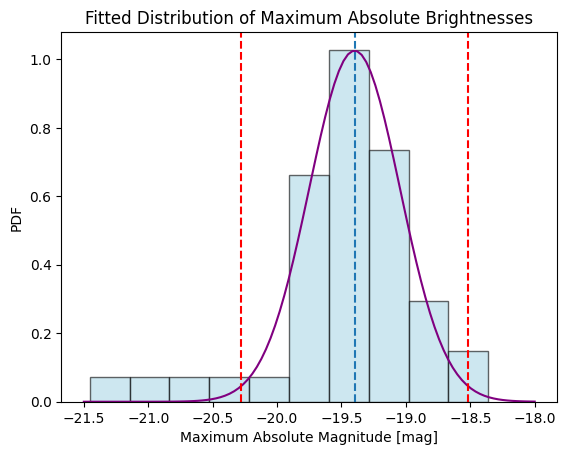

In [66]:
def n_sigma_confidence_interval(sigma, mu, n):
    lower_bound = mu - n * sigma
    upper_bound = mu + n * sigma
    
    return lower_bound, upper_bound


n = 2.5

lower, upper = n_sigma_confidence_interval(std_gaus, mean_gaus, n)

print(f"{n}-sigma Confidence Interval: ({lower:.2f}, {upper:.2f})")


# Fitted histogram plotting

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)


plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(lower, color = 'red', linestyle = 'dashed')
plt.axvline(upper, color = 'red', linestyle = 'dashed')

plt.show()

Next we calculated the $2.5 \sigma$ confidence interval. $2.5 \sigma$ was chosen, because it offers a nice balance between the strictness of $3 \sigma$ and the uncertainty of $2 \sigma$. The literature value of -19.5 is still definitely within out confidence interval, therfore our result isn't statistically very different. 

## 4. Hypothesis Testing

In order to test some hypotheses, we were asked to create a combined quantity data plot. Unfortunately we didn't find any straight forward options, so we had to go with something less traditional. In the first half of this subsection we will discuss the combined quantity data plot "Distance in Mpc vs the Maximum Observed Brightness". We defined our combined quantity as: 

$X:= \frac{log_{10}(d)}{m}$

where:
- $X$ is the combined data quanity in $log_{10}(Mpc)$
- $m$ is the maximum observed luminosity in the V filter
- $d$ is the distance in Mpc that we calculated with the help of the Phillips relationship and the distance modulus formula

We chose to take the logarithm of the d, as opposed to the power of m, because otherwise most data points would gather at the bottom left of the graph except for a few outliers. This would have made the graph hard to read.

As a refresher, here is the plot:

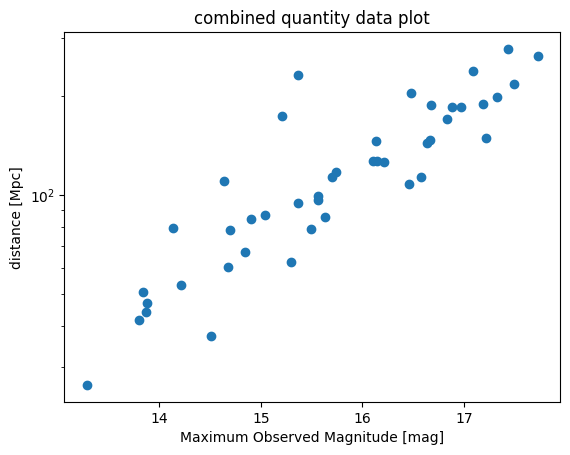

In [67]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

We expected a strong correlation between these two measurements, since we want to use Type Ia supernovae to determine the distance to far away galaxies. We would like to find out if the spread of the data is statistically significant. We define out hypotheses as follows:

- $H_0$: The value of X can be considered constant for all SNe Ia

- $H_a$: The value of X can NOT be considered constant for all SNe Ia

We generate a random subset (with replacement) and compare it the the original data set in order to test this hypothesis.

In [68]:
idx = np.random.randint(44, size=22)
sub_data = data_array[idx,:]
#print(sub_data)
#max abs mag   max obs mag    del m     distance

Now we calculate $X:= \frac{log_{10}(d)}{m}$ for both the subset and the original data set. We chose $log_{10}(d)$ as the numerator and $m$ as the denominator, because we wanted X to represent an esimate for the slope of the best fit line, since the slope = dy/dx. Of course this wouldn't be an exact esimate, since linear regression considers all data points collectively, but it's a good esitmate in order to understand that as the magnitude increases (the SN gets fainter), the distance of the SN also increases and vice versa. The best fit line will be discussed in section 5. Linear Regression. For now we will returns to our hypothesis testing.

In [69]:
X_sub = np.divide(np.log10(sub_data[:,3]),sub_data[:,1])
X_data = np.divide(np.log10(data_array[:,3]), data_array[:,1])
#print(X_sub)
#print(X_data)

Our values for X seem to crowd around 0.12. Next we will compare the histograms of both data sets and test if the two sets differ from one another. 


Entire data set stats:
 Mean:  0.12915844676597166 
 Standard deviation 0.008750944083704961
Subset data stats:
 Mean:  0.1271067146714909 
 Standard deviation 0.009580209458081225


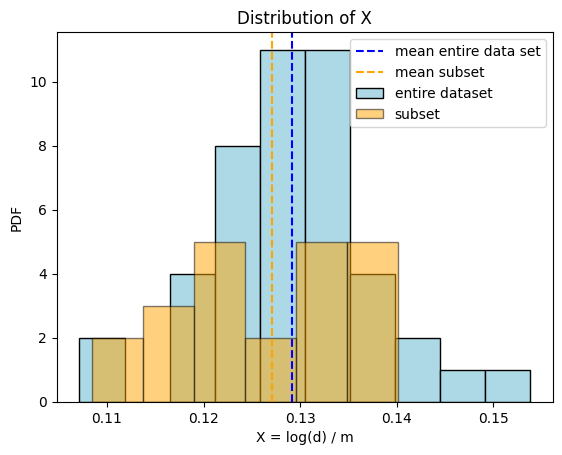

In [70]:
plt.hist(X_data, bins=10, edgecolor = 'black', color = 'lightblue', alpha=1)
plt.hist(X_sub, bins=6, edgecolor = 'black', color = 'orange', alpha=0.5)

mean_X_data = np.mean(X_data)
mean_X_sub = np.mean(X_sub)
std_X_data = np.std(X_data)
std_X_sub = np.std(X_sub)
print('Entire data set stats:\n Mean: ', mean_X_data, '\n Standard deviation', std_X_data)
print('Subset data stats:\n Mean: ', mean_X_sub, '\n Standard deviation', std_X_sub)

plt.axvline(mean_X_data, color = 'blue', linestyle = 'dashed')
plt.axvline(mean_X_sub, color = 'orange', linestyle = 'dashed')
plt.xlabel('X = log(d) / m')
plt.ylabel('PDF')
plt.title('Distribution of X')
plt.legend(['mean entire data set', 'mean subset', 'entire dataset', 'subset'], loc = "upper right")

plt.show()

#### Two sampled t-test
For the hypothesis testing we chose the parametric two sample test that compares the means of two populations, namely the t-test. For this test we did not assumes equal population variances, not equal population sizes. If the means are significantly different, then we can not assume X to be a constant.

In [71]:
from scipy.stats import ttest_ind

n_1 = len(X_sub)
n_2 = len(X_data)
#t_stat, p_val = ttest_ind(X_data, X_sub)
t_stat, p_val = ttest_ind(X_data, X_sub, equal_var=False)
print('t statistic = ', t_stat)
print('p value = ', p_val)

t statistic =  0.8272438535658332
p value =  0.41319954170843354


We test out hypothesis with $2.5\sigma$ confidence, corresponding to 98.758% confidence level and a significance level of $\alpha$ = 0.01242. The p value calculated by the t test tells us the area under the curve that allows us to reject $H_0$. If $p < \alpha$, then we may reject $H_0$

In [72]:
if (p_val < 0.01242):
    print('We can reject H_0')
else:
    print('We can NOT reject H_0')

We can NOT reject H_0


$H_0$: The value of X can be considered constant for all SNe Ia

$H_a$: The value of X can NOT be considered constant for all SNe Ia

Since we can not reject H_0 this means that the ratio between the observed magnitude and the distance to a supernova is a constant and does not vary significantly. This is a good result for us, because this means that Type Ia SNe have indeed a constant peak brightness. Therefore we can use these cosmic events to determine distances.

#### KS Test
Another test that we could perform is a non parametric, two tailed Kolmogorov-Smirnov test to analyze wether the two samples are different form one another. Since we have a large sample, we used the critical value table from Lecture 7+8 slide 80. We had to choose the level of significance $\alpha = 0.01$ since a formula for $2.5\sigma$ was not available. This significance level is a bit stricter than $2.5\sigma$.

In [73]:
from scipy.stats import ks_2samp
ks_stat, p_val_ks = ks_2samp(X_data, X_sub)
crit = 1.63*np.sqrt((n_1+n_2)/(n_1*n_2))

if (ks_stat < crit):
    print('We can NOT reject H_0')
else:
    print('We can reject H_0')

We can NOT reject H_0


The KS test delivered the same result as the t-test.

### Absolute Magnitude
#### One samples test ($\mu_1=\mu_2$)
Another more meaningful hypothesis that we can test is, if the value of -19.5 mag [7] for SNe Ia you often find in literature is significantly different to our calculated values. For this we perform a one sample parametric tet, and compare the means.

In [89]:
from scipy.stats import ttest_1samp

def hypothesis_test(sample_mean, sample_std, data, hypothesized_mean=-19.5, alpha=0.01242):
    
    sample_size = len(data)

    # Perform a one-sample t-test
    t_stat, p_value = ttest_1samp(data, hypothesized_mean)

    # Print the results
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"Sample Size: {sample_size}")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Interval: ({sample_mean-2.5*sample_std/np.sqrt(sample_size)},{sample_mean+2.5*sample_std/np.sqrt(sample_size)})")

    # Decision rule
    if p_value < alpha:
        print(f"Result: Reject the null hypothesis (H₀), The mean is significantly different from {hypothesized_mean}.")
    else:
        print(f"Fail to reject the null hypothesis (H₀): The mean is not significantly different from {hypothesized_mean}.")
    

    
hypothesis_test(mean_gaus, std_gaus, max_abs_mag)


Sample Mean: -19.40
Sample Standard Deviation: 0.35
Sample Size: 44
T-Statistic: 0.47
P-Value: 0.6421
Interval: (-19.531187756032963,-19.2652092824868)
Fail to reject the null hypothesis (H₀): The mean is not significantly different from -19.5.


The hypothesis test suggests that we can not reject $H_0$ and the theoretical value of -19.5 is consistent with our calculations. This is a good result, because it is well in accordance with the established science.

## 5. Linear Regression
In the following section we will try to fit a linear model to our combined quantity data plot. A reoccuring problem is that we only have the distances calculated from the Phillips Relation which we cannot compare to check if they are correct.

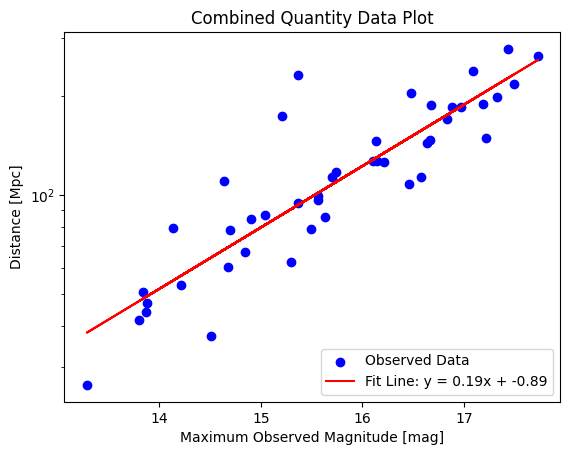

Error:0.014898197098827544


In [81]:
from scipy.stats import linregress

# Perform linear regression (on a log scale for the distances)
log_dist = np.log10(dist)  # Convert distances to log10 scale
slope_bestfit, intercept, r_value, p_value, std_err = linregress(max_obs_mag, log_dist)

# Generate the best-fit line
fit_line = slope_bestfit * np.array(max_obs_mag) + intercept

# Convert the fit line back to the original scale
fit_line_exp = 10**fit_line

# Plot the scatter points
plt.scatter(max_obs_mag, dist, label='Observed Data', color='blue')

# Plot the fitted line
plt.plot(max_obs_mag, fit_line_exp, label=f'Fit Line: y = {slope_bestfit:.2f}x + {intercept:.2f}', color='red')

# Set logarithmic scale for the y-axis
plt.semilogy()

# Add labels and title
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('Distance [Mpc]')
plt.title('Combined Quantity Data Plot')
plt.legend()

# Show the plot
plt.show()

print(f"Error:{std_err}")


This line tries to fit log distance to magnitudes (because mag is logarithmic). The idea behind this is that if SNe Ia have a somewhat constant peak luminosity it should get brighter and dimmer also with a somewhat constant dependency on the distance. 
The line fits our dataset as good as it can but it is still difficult to justify this relation.

Calculating some values which give information about the correlation:

In [76]:
from scipy.stats import pearsonr


mean_dist = np.mean(log_dist)
mean_obs_mag = np.mean(max_obs_mag) 
n = len(log_dist)

cov_xy = np.sum((max_obs_mag - mean_obs_mag) * (log_dist - mean_dist)) / (n - 1)

coeff, p_val = pearsonr(max_obs_mag, log_dist)

print(f"Covaraince = {cov_xy}")
print(f'Pearson Coefficient = {coeff}')

Covaraince = 0.26280760679357235
Pearson Coefficient = 0.8878825187092749


A positive covariance indicates that when x increases, y tends to increase as well.

A positive Pearson Coefficient indicates that we have a positive slope, which is indeed the case for our data (see plot). A value of approximately 0.89 indicates that we have a rather strong correlation between our data points. 

### Bootstrap Method
Next we perform the bootstrap method to calculate a distribution of parameters that fit out data. This method generates a random data sample (with replacement) from the original sample, and fits the best linear relationship to this new sample. We repeated this 1000 times to make sure our results are solid.

Bootstrap 1-sigma interval for the slope: (0.1729, 0.1974)
removing 159 lowest and highest estimates
Mean slope: 0.1861


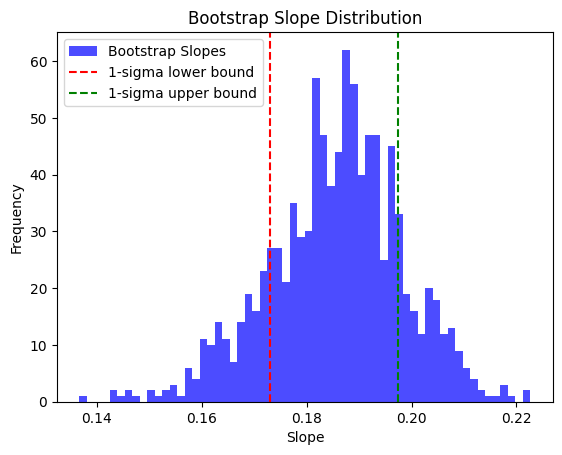

In [77]:
import random
#Number of bootstrap samples
n_bootstrap = 1000
N= len(max_obs_mag)


# Store bootstrap slopes
bootstrap_slopes = []


# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Resample data with replacement
    indices = np.random.randint(0, N, N) 

    resampled_mag = max_obs_mag[indices]
    resampled_log_dist = log_dist[indices]
    
    # Fit linear regression to the resampled data
    coefficients = np.polyfit(resampled_mag, resampled_log_dist, deg=1)
    slope = coefficients[0]
    
    # Store the slope
    bootstrap_slopes.append(slope)


bootstrap_slopes = np.sort(bootstrap_slopes)

# Compute the 1-sigma interval (16th and 84th percentiles)
lower_bound = np.percentile(bootstrap_slopes, 16)
upper_bound = np.percentile(bootstrap_slopes, 84)

# Print results
print(f"Bootstrap 1-sigma interval for the slope: ({lower_bound:.4f}, {upper_bound:.4f})")

alpha= 0.318
remove= int(n_bootstrap*alpha/2)
print(f"removing {remove} lowest and highest estimates")
cut= bootstrap_slopes[remove:-remove]
print(f"Mean slope: {np.mean(cut):.4f}")

# Plot the distribution of bootstrap slopes
plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes')
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')
plt.legend()
plt.show()


With the bootstrap method we get a distribution of possible slopes and a confidence interval of around (0.17, 0.20) for the gradient of the slope.

We also fitted a gaussian around the solpe distribution. 

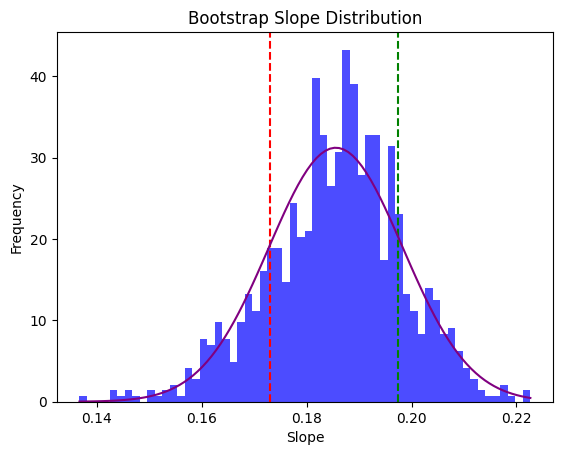

In [78]:
from scipy.stats import norm

plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes', density=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')

# fit a gaussian distribution
x = np.linspace(min(bootstrap_slopes),max(bootstrap_slopes),100)
pdf= norm.pdf(x,np.mean(bootstrap_slopes),np.std(bootstrap_slopes))

plt.plot(x, pdf, 'purple')

plt.show()

We also did some hypothesis testing using the bootstrap method. We want to test if the slope of the best fit line is significantly different from a distribution of bootstrap delivered slopes. For this we run the bootstrap method 100 times and record the mean slope. We set a confidence level of $2.5\sigma$
- $H_0$: the best fit slope is not different from our bootstrap slopes
- $H_a$: the best fit slope is different from our bootstrap slopes

In [87]:
n_bootstrap = 1000
N= len(max_obs_mag)

bootstrap_means = []

for i in range(100):
    bootstrap_slopes = []

    for _ in range(n_bootstrap):
        indices = np.random.randint(0, N, N) 
        resampled_mag = max_obs_mag[indices]
        resampled_log_dist = log_dist[indices]
        coefficients = np.polyfit(resampled_mag, resampled_log_dist, deg=1)
        slope = coefficients[0]
        bootstrap_slopes.append(slope)

    bootstrap_slopes = np.sort(bootstrap_slopes)
    alpha= 0.05
    remove= int(n_bootstrap*alpha/2)
    cut= bootstrap_slopes[remove:-remove]
    mean_slope = np.mean(cut)
    bootstrap_means.append(mean_slope)

bootstrap_means_array = np.array(bootstrap_means)

t_stat, p_value = ttest_1samp(bootstrap_means, slope_bestfit)
print("Bootstrap distribution mean: ", np.mean(bootstrap_means_array))
print(f"Interval: ({np.mean(bootstrap_means_array)-2.5*np.std(bootstrap_means_array)/np.sqrt(len(bootstrap_means))},{np.mean(bootstrap_means_array)+2.5*np.std(bootstrap_means_array)/np.sqrt(len(bootstrap_means))})")
if p_value < 0.01242:
        print(f"Result: Reject the null hypothesis (H₀), The bootstrap slope is significantly different from {slope_bestfit}.")
else:
        print(f"Fail to reject the null hypothesis (H₀): The bootstrap slope is not significantly different from {slope_bestfit}.")
    


Bootstrap distribution mean:  0.18588330558251648
Interval: (0.18578600212822163,0.18598060903681132)
Result: Reject the null hypothesis (H₀), The bootstrap slope is significantly different from 0.18633297466472545.


This test shows that our slope parameter fitted by the bootstrap method is significantly different from the best fit slope calculated at the beginning of this section, even though the slopes start to differ at a thousandth of a unit. This rejection probably happened due to the fact that we repeat the sampling 1000 times, therefore we don't get much variance in the bootstrap slope values. We conclude that this isn't a very big difference and round the slope to 0.19 to help these two methods get along again. 

## Conclusion
...

## References

1. Type Ia Supernova Explosions in Binary Systems: A Review (2023), Zheng-Wei Liu, Friedrich K. Röpke, Zhanwen Han
2. UBVRI light curves of 44 type Ia supernovae (2006), Jha S. , Kirshner R.P., Challis P. et.al
3. Type IA supernovae as standard candles (1992), Branch D. & Tammann G. A., 1992ARA&A..30..359B
4. COSMOS - The SAO Encyclopedia of Astronomy
https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova+Light+Curves
5. Secondary Maximum in the Near-Infrared Light Curves of Type Ia Supernovae (2006), Kasen D., 2006ApJ...649..939K
6. The absolute Magnitudes of Type Ia Supernovae (1993), Phillips M. M., 1993ApJ...413L.105P
7. Cepheid Calibration of the Peak Brightness of Type Ia Supernovae. IX. SN 1989B in NGC 3627 (1999), Saha A. et al, 1999ApJ...522..802S